# Assignment: Analyzing and Predicting Petrol Consumption

## Objective
You are tasked with analyzing and predicting petrol consumption using the provided dataset: [Petrol Consumption Dataset](https://www.kaggle.com/datasets/arpikr/petrol-consumption). Follow the steps outlined below to complete the assignment.

## Instructions

### 1. Dataset Review and Loading
- Download the dataset from the provided link.
- Load the dataset into a Python environment using pandas.
- Provide a brief overview of the dataset, including the structure, columns, and types of data.

### 2. Data Cleaning
- Check for missing or null values in the dataset.
- Handle null values appropriately (e.g., imputation or removal), and provide justification for your chosen method.
- Ensure the dataset is ready for analysis by performing necessary preprocessing steps.

### 3. Exploratory Data Analysis (EDA)
- Perform EDA to understand the relationships and patterns in the dataset.
- Include the following analyses:
  - Descriptive statistics of numerical columns.
  - Distribution of features (use histograms, boxplots, etc.).
- Summarize key insights from your analysis.

### 4. Model Building
- Split the dataset into training and testing sets (use an 80-20 split).
- Train the following models on the dataset:
  - **Decision Tree Regressor**
  - **Random Forest Regressor**
- Use relevant libraries such as scikit-learn for implementation.

### 5. Model Evaluation
- Evaluate the performance of both models using appropriate metrics such as:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - R-squared Score
- Compare the performance of the Decision Tree and Random Forest models.

### 6. Documentation
- Document your code, approach, and findings throughout the process.
- Include comments and explanations in your code to improve readability.

### 7. Conclusion
- Provide a summary of your analysis and model results.
- Suggest possible improvements or extensions to the analysis.

## Submission
- Submit a Jupyter Notebook (`.ipynb`) file with your code and analysis.
- Include a summary report (maximum 1 page) highlighting your findings and conclusions.

## Bonus
- Experiment with hyperparameter tuning for the Random Forest Regressor to improve performance and document the impact of your changes.


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
df = pd.read_csv('./Dataset/petrol_consumption.csv')

df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [11]:
df.isnull().sum()


Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [13]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


array([[<Axes: title={'center': 'Petrol_tax'}>,
        <Axes: title={'center': 'Average_income'}>],
       [<Axes: title={'center': 'Paved_Highways'}>,
        <Axes: title={'center': 'Population_Driver_licence(%)'}>],
       [<Axes: title={'center': 'Petrol_Consumption'}>, <Axes: >]],
      dtype=object)

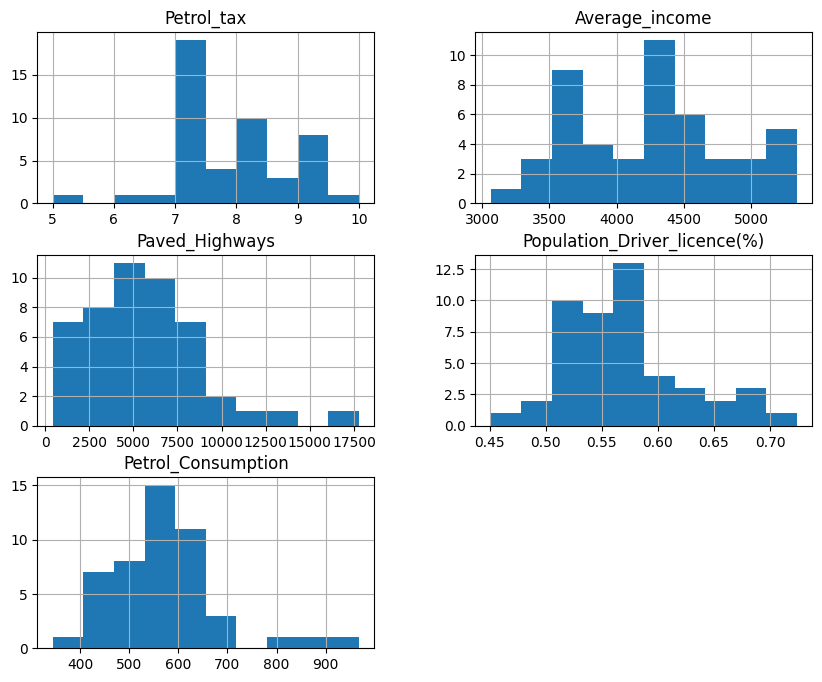

In [34]:
df.hist(figsize=(10, 8))

In [25]:
X = df.drop("Petrol_Consumption", axis=1)
y = df["Petrol_Consumption"]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

dt_mae, dt_mse, dt_r2 = evaluate_model(y_test, dt_predictions)
rf_mae, rf_mse, rf_r2 = evaluate_model(y_test, rf_predictions)

print(f"Decision Tree - MAE: {dt_mae}, MSE: {dt_mse}, R2: {dt_r2}")
print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, R2: {rf_r2}")

Decision Tree - MAE: 94.3, MSE: 17347.7, R2: -1.585777975194108
Random Forest - MAE: 53.961, MSE: 6835.456590000002, R2: -0.018865503831483332
